<a href="https://colab.research.google.com/github/UlkuTuncerKucuktas/MACHINE-AND-DEEP-LEARNING-ALGORITHMS-AND-STRUCTURES/blob/main/Naive_Bayes_%C3%9Clk%C3%BC_Tuncer_K%C3%BC%C3%A7%C3%BCkta%C5%9F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**İÇİNDEKİLER**



1.   Naive Bayes İçin Class Tanımlaması
2.   Derste Yapılan Örnek
3.   Korona Örneği








**Naive Bayes İçin Class Tanımlaması**

In [323]:
class Data:
  def __init__(self):
    self.column_names = [] # Sütunların isimleri
    self.full_data = [] # Bütün datanın depolandığı variable
    self.labels = [] # Labelların depolandığı variable
    self.Counts = [] # Labelların sütunlara göre olma sayılarının depolandığı variable
    self.Probabilities = [] # Labelların sütunlara göre olma olasılıklarının depolandığı variable
    self.Predict_Probabilities = [] # Labelların tahmin edilmek istenen örnek için olma olasılıkları
    self.Label_Ratio = [] # Labelların genel olarak olma olasılığı

  def Enter_ColumnNames(self):

    "Kullanıcıdan input fonksiyonu ile verinin sütun isimlerini toplar"

    feature_column_names = []
    while 1:
      column_name = input("Add Column Name \nPress C if you are finished :\n") # input fonksiyonu ile alıp self.column_names te depolar
      if column_name == "C":
        break
      feature_column_names.append(column_name)
    self.column_names = feature_column_names
  
  def Enter_Rows(self):

    "Kullanıcıdan input fonksiyonu ile verinin satır verilerini toplar"


    self.full_data = [self.column_names]
    rng = input("How many row you want to enter :\n")
    print("Follow the order of {}\n".format(self.column_names))
    print("Put a white space between columns !\n")
    for i in range(int(rng)):
      row = input("Enter row number {}\n".format(i))
      row = list(row.split(" "))
      if len(row) != len(self.column_names):
        print("Please enter a row containing {} element ".format(len(self.column_names)))
        break
      self.full_data.append(row)

    self.Get_Labels()              # Veri girişi tamamlanınca olasılık ve sayı değerleri hesaplanır.
    self.Calculate_Counts()
    self.Calculate_Probabilities()


  def Get_Labels(self):

    "Toplanan veride son sütunda kaç farklı label olduğunu bulur ve depolar"


    self.labels = []
    last_column = [row[-1] for row in self.full_data]
    for i in last_column[1:] :
      
      if i not in self.labels:
        self.labels.append(i)
    self.Calculate_LabelRatio() # Kaç farklı label olduğu bulununca genel olarak oranları , olasılıkları hesaplanır
    
  def Print_FullData(self):

    """ Tüm veriyi konsola yazar  """


    for row in self.full_data:
      print(row)
  
  def Calculate_LabelRatio(self):

    """Naive Bayes algoritmasında kullanmak için Labelların oranını hesaplar 
    O labelın genel olarak olma olasılığıda diyebiliriz
    """

    self.Label_Ratio = []
    last_column = [row[-1] for row in self.full_data]
    for label in self.labels:
      labelcount = 0
      for element in last_column:
        if element == label:
          labelcount += 1
      self.Label_Ratio.append(labelcount)
    self.Label_Ratio = [x / sum(self.Label_Ratio) for x in self.Label_Ratio]


  def Calculate_Counts(self):
    """
    Labellara göre Sütunlarda yes ve no olma sayılarını hesaplar
    """


    for label in self.labels:
      rows_for_that_label = []
      counts_for_that_label = []
      for row in self.full_data[1:]:
        if row[-1] == label:
          rows_for_that_label.append(row[:-1])
      for j in range(len(rows_for_that_label[0])):
        column = [row[j] for row in rows_for_that_label]
        Yes = 0
        No = 0
        for k in column :
          if k == "Yes":
            Yes += 1
          if k == "No":
            No += 1
        counts_for_that_label.append([Yes,No])
      self.Counts.append(counts_for_that_label) 

  def Print_Counts(self):

    """
    Hesaplanan Yes No Oranlarını konsola açık bir biçimde yazdırır.
    """    

    print("Counts Table \n")
    j = 0
    for label in self.Counts:
      i = 0
      for column in label :
        print(self.labels[j],"{} Yes : {}".format(self.column_names[i],column[0]))
        print(self.labels[j],"{} No : {}".format(self.column_names[i],column[1]))  
        i += 1
      j +=1
  
  def Calculate_Probabilities(self):
    """
    Labelların sütunlarda yes veya no olma olasılıkları ayrı ayrı hesaplanır.
    """
    for label in self.Counts:
      label_probabilities = []
      for column in label :
        yes_probability = column[0]/sum(column)
        no_probability = column[1]/sum(column)
        label_probabilities.append([yes_probability,no_probability])
      self.Probabilities.append(label_probabilities)

  def Print_Probabilities(self):
    """
    Hesaplanan olasılıklar konsola yazdırılır.
    """
    print("Probability Table \n")
    j = 0
    for label in self.Probabilities:
      i = 0
      for column in label :
        print(self.labels[j],"{} Yes : {}".format(self.column_names[i],column[0]))
        print(self.labels[j],"{} No : {}".format(self.column_names[i],column[1]))  
        i += 1
      j +=1
    
  def Predict(self,prediction_data):
    """
    Var olan dataya göre hesapladığı olasılıkları kullanarak yeni gelen data için tahminde bulunur.
    """

    pred_data = list(prediction_data.split(" "))
    self.Predict_Probabilities = []
    for label in self.Probabilities:
      i = 0
      probability = 1  # Probability başta 1 yes veya no olmasına göre o olasılık ile çarpılır
      for column in label :
        if pred_data[i] == "Yes":
          probability *= column[0] # Evet ise evet olma olasılığı ile çarp
        if pred_data[i] == "No":
          probability *= column[1]  # Hayır ise hayır olma olasılığı ile çarp
        i+=1
      self.Predict_Probabilities.append(probability)
    self.Predict_Probabilities = [a * b for a, b in zip(self.Predict_Probabilities, self.Label_Ratio)]# Genel olma olasılıkları ile çarp

    i = 0
    for label in self.labels :
      print(label,"Probability : {} / P(E) ".format(self.Predict_Probabilities[i]))
      i+=1
    max_value = max(self.Predict_Probabilities)
    max_index = self.Predict_Probabilities.index(max_value) # Maximum olasılıklı olan labelı seç ve onu tahmin et
    print("Prediction : {}".format(self.labels[max_index]))

**Derste Yapılan Örnek**

In [316]:
data = Data()
data.Enter_ColumnNames() # Sütun isimlerini ister

Add Column Name 
Press C if you are finished :
Magazine Promotion
Add Column Name 
Press C if you are finished :
Watch Promotion
Add Column Name 
Press C if you are finished :
Life-Insurance Promotion
Add Column Name 
Press C if you are finished :
Credit Card Insurance
Add Column Name 
Press C if you are finished :
Sex
Add Column Name 
Press C if you are finished :
C


In [317]:
data.Enter_Rows() # Satır verilerini ister

How many row you want to enter :
10
Follow the order of ['Magazine Promotion', 'Watch Promotion', 'Life-Insurance Promotion', 'Credit Card Insurance', 'Sex']

Put a white space between columns !

Enter row number 0
Yes No No No Male
Enter row number 1
Yes Yes Yes Yes Female
Enter row number 2
No No No No Male
Enter row number 3
Yes Yes Yes Yes Male
Enter row number 4
Yes No Yes No Female
Enter row number 5
No No No No Female
Enter row number 6
Yes Yes Yes Yes Male
Enter row number 7
No No No No Male
Enter row number 8
Yes No No No Male
Enter row number 9
Yes Yes Yes No Female


In [322]:
data.Print_FullData() # Elde ettiği datayı yazdırır

['Magazine Promotion', 'Watch Promotion', 'Life-Insurance Promotion', 'Credit Card Insurance', 'Sex']
['Yes', 'No', 'No', 'No', 'Male']
['Yes', 'Yes', 'Yes', 'Yes', 'Female']
['No', 'No', 'No', 'No', 'Male']
['Yes', 'Yes', 'Yes', 'Yes', 'Male']
['Yes', 'No', 'Yes', 'No', 'Female']
['No', 'No', 'No', 'No', 'Female']
['Yes', 'Yes', 'Yes', 'Yes', 'Male']
['No', 'No', 'No', 'No', 'Male']
['Yes', 'No', 'No', 'No', 'Male']
['Yes', 'Yes', 'Yes', 'No', 'Female']


In [318]:
data.Print_Counts() # Olma sayılarını yazdırır

Counts Table 

Male Magazine Promotion Yes : 4
Male Magazine Promotion No : 2
Male Watch Promotion Yes : 2
Male Watch Promotion No : 4
Male Life-Insurance Promotion Yes : 2
Male Life-Insurance Promotion No : 4
Male Credit Card Insurance Yes : 2
Male Credit Card Insurance No : 4
Female Magazine Promotion Yes : 3
Female Magazine Promotion No : 1
Female Watch Promotion Yes : 2
Female Watch Promotion No : 2
Female Life-Insurance Promotion Yes : 3
Female Life-Insurance Promotion No : 1
Female Credit Card Insurance Yes : 1
Female Credit Card Insurance No : 3


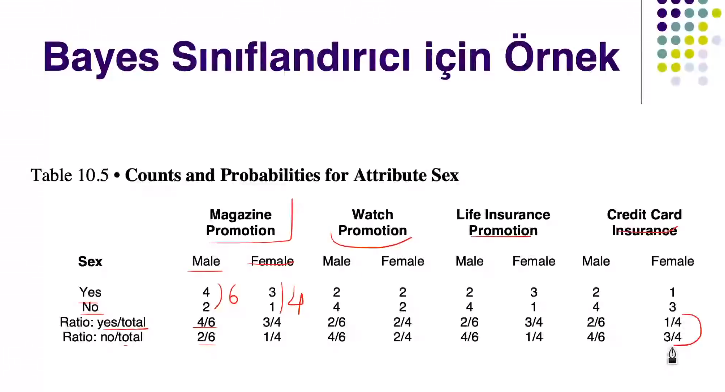

In [319]:
data.Print_Probabilities()# Olma olasılıklarını yazdırır

Probability Table 

Male Magazine Promotion Yes : 0.6666666666666666
Male Magazine Promotion No : 0.3333333333333333
Male Watch Promotion Yes : 0.3333333333333333
Male Watch Promotion No : 0.6666666666666666
Male Life-Insurance Promotion Yes : 0.3333333333333333
Male Life-Insurance Promotion No : 0.6666666666666666
Male Credit Card Insurance Yes : 0.3333333333333333
Male Credit Card Insurance No : 0.6666666666666666
Female Magazine Promotion Yes : 0.75
Female Magazine Promotion No : 0.25
Female Watch Promotion Yes : 0.5
Female Watch Promotion No : 0.5
Female Life-Insurance Promotion Yes : 0.75
Female Life-Insurance Promotion No : 0.25
Female Credit Card Insurance Yes : 0.25
Female Credit Card Insurance No : 0.75


In [320]:
data.Predict("Yes Yes No No") # Tahmini yapar.

Male Probability : 0.059259259259259255 / P(E) 
Female Probability : 0.028125 / P(E) 
Prediction : Male


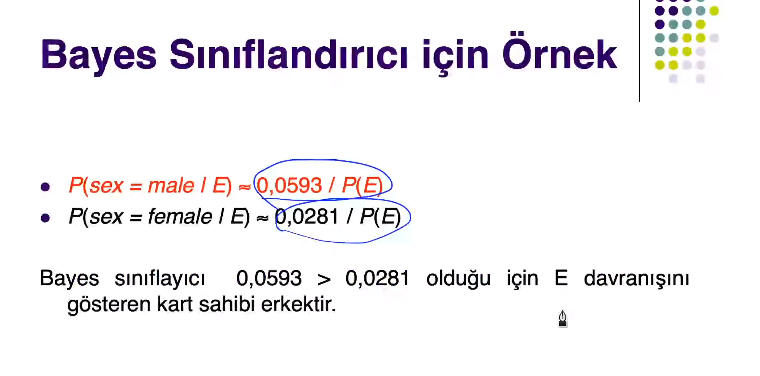

**Korona Örneği**

In [325]:
coronadata = Data()
coronadata.Enter_ColumnNames()

Add Column Name 
Press C if you are finished :
Tiredness 
Add Column Name 
Press C if you are finished :
Fever
Add Column Name 
Press C if you are finished :
Cough
Add Column Name 
Press C if you are finished :
Runny nose
Add Column Name 
Press C if you are finished :
Loss of smell and taste
Add Column Name 
Press C if you are finished :
Diagnosis
Add Column Name 
Press C if you are finished :
C


In [326]:
coronadata.Enter_Rows()

How many row you want to enter :
8
Follow the order of ['Tiredness ', 'Fever', 'Cough', 'Runny nose', 'Loss of smell and taste', 'Diagnosis']

Put a white space between columns !

Enter row number 0
Yes Yes Yes Yes No Flu
Enter row number 1
Yes Yes Yes Yes Yes Corona
Enter row number 2
Yes No No Yes Yes Corona
Enter row number 3
Yes No No No No Healthy
Enter row number 4
No No No No No Healthy
Enter row number 5
Yes Yes No Yes No Flu
Enter row number 6
No Yes Yes Yes No Flu
Enter row number 7
Yes No No No Yes Corona


In [327]:
coronadata.Print_FullData()

['Tiredness ', 'Fever', 'Cough', 'Runny nose', 'Loss of smell and taste', 'Diagnosis']
['Yes', 'Yes', 'Yes', 'Yes', 'No', 'Flu']
['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Corona']
['Yes', 'No', 'No', 'Yes', 'Yes', 'Corona']
['Yes', 'No', 'No', 'No', 'No', 'Healthy']
['No', 'No', 'No', 'No', 'No', 'Healthy']
['Yes', 'Yes', 'No', 'Yes', 'No', 'Flu']
['No', 'Yes', 'Yes', 'Yes', 'No', 'Flu']
['Yes', 'No', 'No', 'No', 'Yes', 'Corona']


In [329]:
coronadata.Print_Counts()

Counts Table 

Flu Tiredness  Yes : 2
Flu Tiredness  No : 1
Flu Fever Yes : 3
Flu Fever No : 0
Flu Cough Yes : 2
Flu Cough No : 1
Flu Runny nose Yes : 3
Flu Runny nose No : 0
Flu Loss of smell and taste Yes : 0
Flu Loss of smell and taste No : 3
Corona Tiredness  Yes : 3
Corona Tiredness  No : 0
Corona Fever Yes : 1
Corona Fever No : 2
Corona Cough Yes : 1
Corona Cough No : 2
Corona Runny nose Yes : 2
Corona Runny nose No : 1
Corona Loss of smell and taste Yes : 3
Corona Loss of smell and taste No : 0
Healthy Tiredness  Yes : 1
Healthy Tiredness  No : 1
Healthy Fever Yes : 0
Healthy Fever No : 2
Healthy Cough Yes : 0
Healthy Cough No : 2
Healthy Runny nose Yes : 0
Healthy Runny nose No : 2
Healthy Loss of smell and taste Yes : 0
Healthy Loss of smell and taste No : 2


In [330]:
coronadata.Print_Probabilities()

Probability Table 

Flu Tiredness  Yes : 0.6666666666666666
Flu Tiredness  No : 0.3333333333333333
Flu Fever Yes : 1.0
Flu Fever No : 0.0
Flu Cough Yes : 0.6666666666666666
Flu Cough No : 0.3333333333333333
Flu Runny nose Yes : 1.0
Flu Runny nose No : 0.0
Flu Loss of smell and taste Yes : 0.0
Flu Loss of smell and taste No : 1.0
Corona Tiredness  Yes : 1.0
Corona Tiredness  No : 0.0
Corona Fever Yes : 0.3333333333333333
Corona Fever No : 0.6666666666666666
Corona Cough Yes : 0.3333333333333333
Corona Cough No : 0.6666666666666666
Corona Runny nose Yes : 0.6666666666666666
Corona Runny nose No : 0.3333333333333333
Corona Loss of smell and taste Yes : 1.0
Corona Loss of smell and taste No : 0.0
Healthy Tiredness  Yes : 0.5
Healthy Tiredness  No : 0.5
Healthy Fever Yes : 0.0
Healthy Fever No : 1.0
Healthy Cough Yes : 0.0
Healthy Cough No : 1.0
Healthy Runny nose Yes : 0.0
Healthy Runny nose No : 1.0
Healthy Loss of smell and taste Yes : 0.0
Healthy Loss of smell and taste No : 1.0


In [332]:
coronadata.Predict("Yes No No Yes Yes")

Flu Probability : 0.0 / P(E) 
Corona Probability : 0.1111111111111111 / P(E) 
Healthy Probability : 0.0 / P(E) 
Prediction : Corona
